In [52]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# Zad. 1

Proszę napisać modyfikację algorytmu k-means (wersja Lloyd) - CEC zgodnie z algorytmem: [Pseudo kod](http://ww2.ii.uj.edu.pl/~spurek/zad/lloyd.pdf)

Testowe zbiory danych:

[Zbiór 1](http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss.txt)

[Zbiór 2](http://ww2.ii.uj.edu.pl/~spurek/zad/EllipseGauss2.txt)

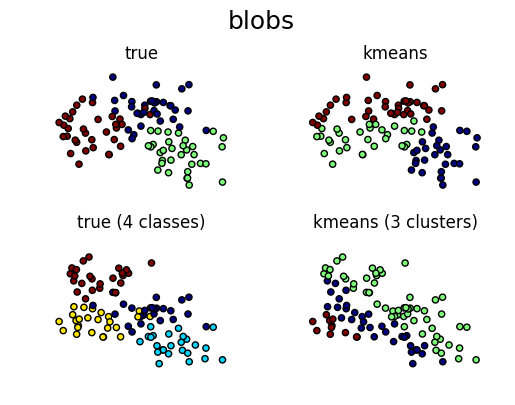

In [53]:
class CEC(object):
    
    def __init__(self, eps):
        
        self.labels = None
        self.clusters = None
        self.n_clusters = None
        self.cluster_centers = None
        
        self.probs = None
        self.covs = None
        self.epsilon = eps
       

    def fit(self, X, n_clusters):
        
        def f(x, i):
            return - np.log(self.probs[i]) - np.log(multivariate_normal.pdf(x, mean=self.cluster_centers[i], cov=self.covs[i]))
        
        n = X.shape[0]
        self.n_clusters = n_clusters
        
        h = float("inf")
        
        # initialize cluster centers randomly
        self.cluster_centers = X[np.random.choice(n, self.n_clusters, replace=False)]
        
        # initialize probabilities
        self.probs = np.repeat(1 / n_clusters, n_clusters)
        
        # initialize covariance matrices
        self.covs = np.array([np.cov(X, rowvar=False)] * n_clusters)

        # iterate until change in energy is smaller than epsilon
        while(True):
            
            # assign points to clusters
            self.labels = []
            for i in range(n):
                self.labels.append(np.argmin(list(map(lambda c: f(X[i], c), range(n_clusters)))))
            self.clusters = np.array([np.array([x for x in range(n) if self.labels[x] == c]) for c in range(self.n_clusters)])
                                           
            # delete small clusters
            
            # compute new cluster centers
            self.cluster_centers = np.array(list(map(lambda c: np.mean(X[c], axis=0), self.clusters)))
            
            # compute new probabilities
            self.probs = list(map(lambda c: self.clusters[c].shape[0] / n, range(self.n_clusters)))
            
            # compute new covariance matrices
            self.covs = list(map(lambda c: np.cov(X[self.clusters[c]], rowvar=False), range(self.n_clusters)))
            
            # compute h_new
            h_new = np.sum(list(map(lambda c: self.probs[c] * 
                                    (-np.log(self.probs[c]) + 1/2 * np.log(np.linalg.det(self.covs[c])) + 
                                     X.shape[1]/2 * np.log(2 * np.pi * np.exp(1))),
                                    range(n_clusters))))
            
            # end if change in energy is smaller than epsilon
            if np.abs(h_new - h) < self.epsilon:
                break
            
            h = h_new
        
        return self

eps = 0.01
    
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
m = CEC(eps).fit(X_blobs, n_classes)

plt.suptitle("blobs" , fontsize=18, verticalalignment='bottom')

plt.subplot(221)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true")

plt.subplot(222)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("kmeans")

X_blobs, y_blobs = make_blobs(n_samples=100, centers=4, n_features=2, random_state=0)
m = CEC(eps).fit(X_blobs, 3)

plt.subplot(223)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true (4 classes)")

plt.subplot(224)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("kmeans (3 clusters)")

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log


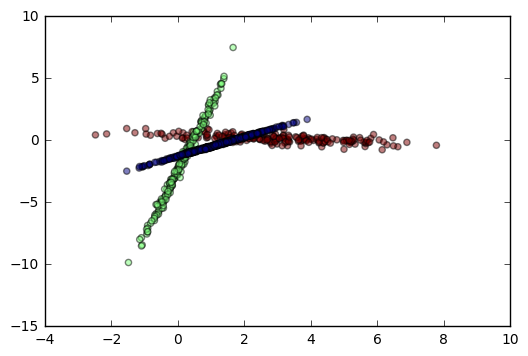

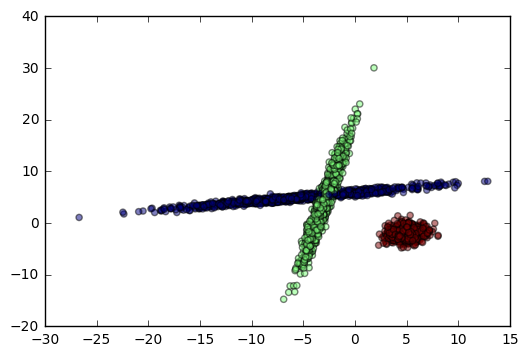

In [54]:
data_1 = pd.read_csv(r"files/EllipseGauss.txt", delimiter=" ", header=None)
data_2 = pd.read_csv(r"files/EllipseGauss2.txt", delimiter=" ", header=None)

ellipse_1 = np.array(data_1)
ellipse_2 = np.array(data_2)

m = CEC(0.0001).fit(ellipse_1, 3)
plt.scatter(ellipse_1[:, 0], ellipse_1[:, 1], c=m.labels, alpha=0.5)
plt.show()

m = CEC(0.0001).fit(ellipse_2, 3)
_ = plt.scatter(ellipse_2[:, 0], ellipse_2[:, 1], c=m.labels, alpha=0.5)